In [13]:
#!/usr/bin/env python
# --------------------------------------------------------
# Distribution statement A. Approved for public release.
# Distribution is unlimited.
# This work was supported by the Office of Naval Research.
# --------------------------------------------------------

import datetime as dt
import numpy as np
import PyIRI
import PyIRI.main_library as ml
import PyIRTAM_library as il
import time
from netCDF4 import Dataset
import PyIRI.plotting as plot

# To record how long it takes to run this script get the start time
st = time.time()

# Create 5x5 horizontal grid:
alon, alat, alon_2d, alat_2d = ml.set_geo_grid(5, 5)

# Create vertical grid:
aalt = np.arange(100, 700, 10)

# Create 15-min resolution time array:
aUT = np.arange(0, 24, 0.25)

# Day of Interest:
year = 2022
month = 1
day = 1
dtime = dt.datetime(year, month, day)

# Specify F10.7:
F107 = 90.8

# Directory on your machine where IRTAM coefficients live
irtam_dir = '/Users/vmakarevich/Documents/Science_VF2/PyIRTAM/IRTAM/'

# Run PyIRTAM
f2_iri, f1_iri, e_iri, es_iri, sun, mag, edp_iri, f2_irtam, f1_irtam, e_irtam, es_irtam, edp_irtam = il.run_PyIRTAM(year, month, day, aUT, alon, alat, aalt, F107, irtam_dir)

et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


PyIRI: IRI_density_1day:------------------------------------------
Determining parameters and electron density for 1 day: year=2022, month=1, day=1
For UT =  [ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75
 21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75]
Longitude =  [-180 -180 -180 ...  180  180  180]
Latitude =  [-90 -85 -80 ...  80  85  90]
Provided F10.7=90.80
For NmF2 determination CCIR used.
Model parameters are being determinaed for 2 levels of solaractivity at F10.7=69.3 and 135.2 SFU
For NmF2 deter

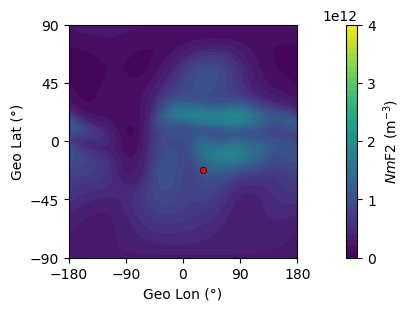

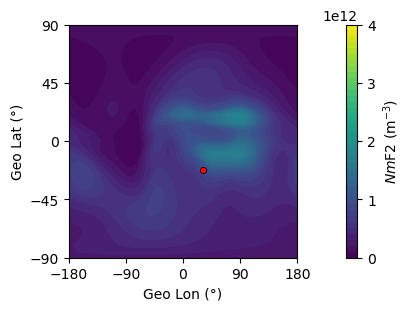

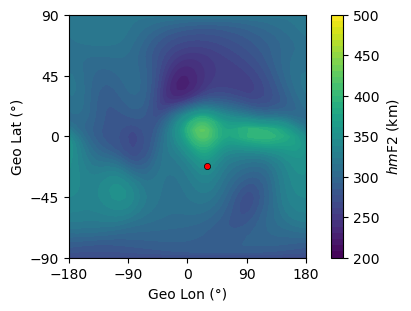

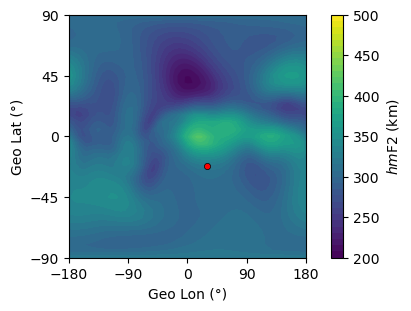

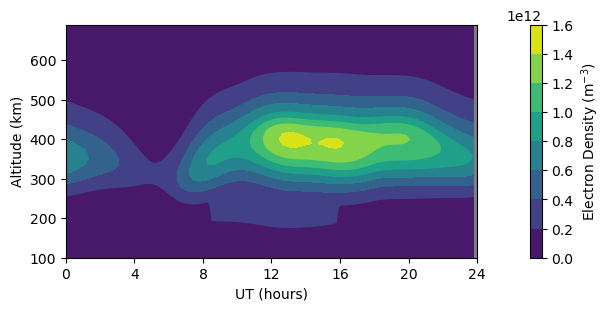

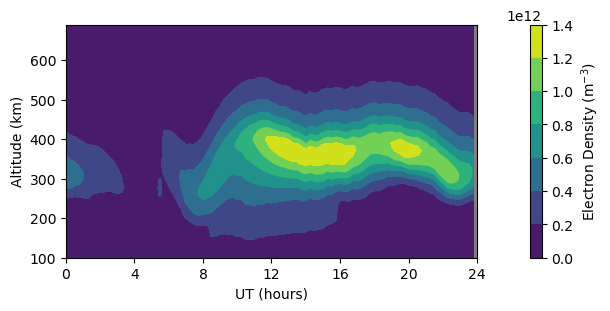

In [15]:
# Directory on your machine where you want to save plots
save_plot_dir = '/Users/vmakarevich/Documents/Science_VF2/PyIRTAM/Fig/'

# Time of snapshot to plot
UT_show = 10

# Plot NmF2 from PyIRI and PyIRTAM
plot.PyIRI_plot_NmF2(f2_iri, aUT, alon, alat, alon_2d, alat_2d, sun,
                    UT_show, save_plot_dir, plot_name='PyIRI_NmF2.pdf')

plot.PyIRI_plot_NmF2(f2_irtam, aUT, alon, alat, alon_2d, alat_2d, sun,
                    UT_show, save_plot_dir, plot_name='PyIRTAM_NmF2.pdf')

# Plot hmF2 from PyIRI and PyIRTAM
plot.PyIRI_plot_hmF2(f2_iri, aUT, alon, alat, alon_2d, alat_2d, sun,
                    UT_show, save_plot_dir, plot_name='PyIRI_hmF2.pdf')

plot.PyIRI_plot_hmF2(f2_irtam, aUT, alon, alat, alon_2d, alat_2d, sun,
                    UT_show, save_plot_dir, plot_name='PyIRTAM_hmF2.pdf')

# Select location for density time series
lon_plot = 0
lat_plot = 0

# Plot density time series for PyIRI and PyIRTAM
plot.PyIRI_plot_1location_diurnal_density(edp_iri, alon, alat, lon_plot, lat_plot,
                                         aalt, aUT, save_plot_dir,
                                         plot_name='PyIRI_EDP_diurnal.pdf')

plot.PyIRI_plot_1location_diurnal_density(edp_irtam, alon, alat, lon_plot, lat_plot,
                                         aalt, aUT, save_plot_dir,
                                         plot_name='PyIRTAM_EDP_diurnal.pdf')
